In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Identificación de Sistemas Dinámicos en Tiempo Discreto

## Polinomios Autoregresivos (Modelo ARX)

Se hace necesario recalcar que para la Identificación del sistema, se espera reconstruir el modelo a partir de las mediciones de las salidas y entradas. Usando el modelo ARX:

![OL_LTID2](figuras/lti_arx.png)

Usando el modelo de ecuación de error tenemos que:

$$y[k] = -a_1y[k-1]-...-a_{n_a}y[k-{n_a}] + b_0u[k]+ b_1u[k-1]+b_2u[k-2]+...+b_{n_b}u[k-{n_b}] + e[k]$$

El objetivo entonces es obtener el vector de parámetros $\theta = [a_1, a_2,...,a_{n_a}, b_0,b_1, b_2,...,b_{n_b}]^T$. Conforme con la relación obtenida para el vector $\theta$, se podría reescribir este modelo así:

$$y[k] = \phi.\theta + e[k]$$

Por tanto para este caso, la matriz de regresión tendría la siguiente forma:

$$\phi = \begin{bmatrix}-y[k-1]&-y[k-2]&...&-y[k-{n_a}]&u[k]&u[k-1]&u[k-2]&...&u[k-{n_b}]\end{bmatrix}$$

Recordar que del error se pueden introducir los polinomios autoregresivos del modelo ARX:

$$A(z) = 1+a_1z^{-1}+...+a_{n_a}z^{-{n_a}}$$

$$B(z) = b_0+b_1z^{-1}+b_2z^{-2}+...+b_{n_b}z^{-{n_b}}$$

Reorganizando entonces:

$$y[k]= \frac{B[z]}{A[z]}u[k] + \frac{1}{A[z]}e[k]$$

$$y[k] = G_e(z)u[k] + H_e(z)e[k]$$

El problema evidente en obtener estas funciones de transferencia estimadas es que se desconoce la naturaleza de la señal $e[k]$, por tanto la señal estimada se debe reconstruir a partir de la función G estimada y el escalón de entrada.

## Ejemplo 1:

Suponga que se realiza la medición de un sistema dinámico y que se mide la señal de la salida con un instrumento con valores de ruido aleatorio.

En un experimento de laboratorio se obtienen 2 respuestas al escalo usando diferentes magnitudes, con un sensor obteniendo un conjunto de valores $y_{n1}, y_{n2}$

Utilice el modelo ARX para determinar una función de transferencia estimada así:

$$G_e(z) = \frac{B(z)}{A(z)}$$



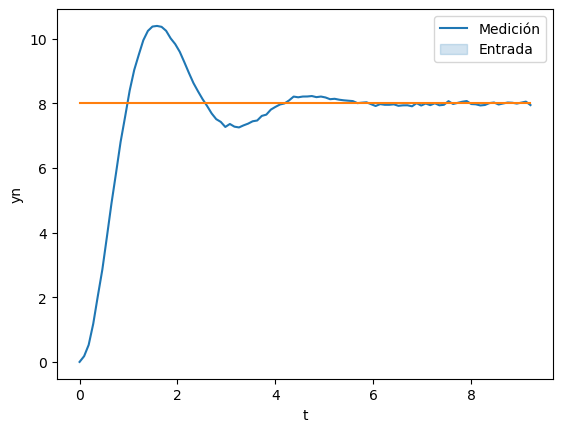

In [2]:
## Sistema de segundo orden en tiempo continuo
K1 = np.random.randint(1,10,dtype=int)
g = control.tf([9],[2,3,9])

# Señal de salida ideal "y" y entrada "u"
t,y = control.step_response(K1*g)
dt = t[1]-t[0]
N = len(t)
u = K1*np.ones(N);

## Ruido para simular la señal de salida capturada "yn"
r = 0.03
e = np.random.normal(0,r,size=N)
## Señal de medición de la salida
yn = y+e
## Ceros
z = np.zeros(N);

## Generando los datos para validar el MODELO
K2 = np.random.randint(1,10,dtype=int)
_,yv = control.step_response(K2*g,t)
## Ruido para las señales de entrenamiento
e = np.random.normal(0,r,size=N)
# Datos para entrenamiento o validación
yv = yv+e
uv = K2*np.ones(N);


data = {'unos':np.ones(N),'yn':yn,'u':u,'t':t,'y1':z,'y2':z,'y3':z,'y4':z,'u1':z,'u2':z,'u3':z,'yv':yv,'uv':uv}
df = pd.DataFrame(data);

sns.lineplot(x = "t", y = "yn", data = df)
sns.lineplot(x = "t", y = "u", data = df)
plt.legend(['Medición','Entrada'])


## Definir la matriz de regresión

Para estimar el modelo se debe usar la matriz de regresión lineal, involucrando estados anteriores de la salida y de la entrada, y agregando un parámetro de ajuste para la regresión lineal.
$$\phi = \begin{bmatrix}-y[k-1]&u[k-1]&u[k-2]&u[k-3]&1\end{bmatrix}$$

In [5]:
df

,unos,yn,u,t,y1,y2,y3,y4,u1,u2,u3,yv,uv
0,1.0,-0.060934,9.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018181,6.0
1,1.0,0.179693,9.0,0.093034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143610,6.0
2,1.0,0.648379,9.0,0.186067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400008,6.0
3,1.0,1.400233,9.0,0.279101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.932222,6.0
4,1.0,2.201550,9.0,0.372135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.522954,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,9.028864,9.0,8.838205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.026836,6.0
96,1.0,9.028296,9.0,8.931239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.007635,6.0
97,1.0,9.031608,9.0,9.024273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.027588,6.0
98,1.0,8.974074,9.0,9.117307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.002400,6.0


In [6]:
## Crear las versiones resagadas de los datos y1, y2, y3, además de las entradas u,
## dependiendo el sistema que se quiera modelar

df.y1 = df.yn.shift(1)
df.y2 = df.yn.shift(2)
df.y3 = df.yn.shift(3)
df.y4 = df.yn.shift(4)

df.u1 = df.u.shift(1)
df.u2 = df.u.shift(2)
df.u3 = df.u.shift(3)

df = df.fillna(0)

## Creación del vector phi
phi = np.array([-df.y1,-df.y3,-df.y4,df.u1,df.unos]).transpose()
#phi = np.array([-df.y1,-df.y2,df.u1,df.u2,df.unos]).transpose()


## Calculando los parámetros
$$\theta_{ls} = \phi^+.y[k]$$

La regresión lineal continúa siendo el modelo que se está estimando y la estimación de parámetros puede hacerse por los métodos de mínimos cuadrados discutidos con anterioridad. Existirán tantos parámetros como columnas tenga la matriz de regresión.

In [7]:
# Parámetro ALPHA para la regularización de los minimos cuadrados (entre 0 y 1)
# Garantiza que la matriz (phi^T*phi)^-1 exista y se pueda estimar 
#los parámetros.
alpha = 0.0
A = np.dot(phi.T,phi) + alpha*np.eye(len(np.dot(phi.T,phi)))
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
theta

array([-1.33556429,  0.32287304,  0.06203637,  0.0558463 , -0.06093364])

## Determinando los polinomios autoregresivos
$$A(z) = 1+a_1z^{-1}+...+a_{n_a}z^{-{n_a}}$$
$$B(z) = b_0+b_1z^{-1}+b_2z^{-2}+...+b_{n_b}z^{-{n_b}}$$

In [8]:
## Definir el modelo ARX    y(t) = G(z)u(t) + H(z)e(t)
## G = B/A,    H = 1/A
## -df.y1,-df.y3,-df.y4,df.u1

z = sym.symbols('z', complex=True)
## Construir los polinomios A(z) y B(z)
A = 1 + theta[0]*z**-1 + theta[1]*z**-3+ theta[2]*z**-4   
B = theta[3]*z**-1

## Calcular la función de transferencia G y H en simbólica
G = B/A
G = G.simplify()


In [9]:
 G_e


NameError: name 'G_e' is not defined

## Construir la función de transferencia estimada en Td
$$G_e(z)=\frac{B(z)}{A(z)} = \frac{b_0 + b_1z^{-1}+b_2z^{-2}+...+b_{n_b}z^{-n_b}}{1+a_1z^{-1}+...+a_{n_a}z^{-n_a}}$$

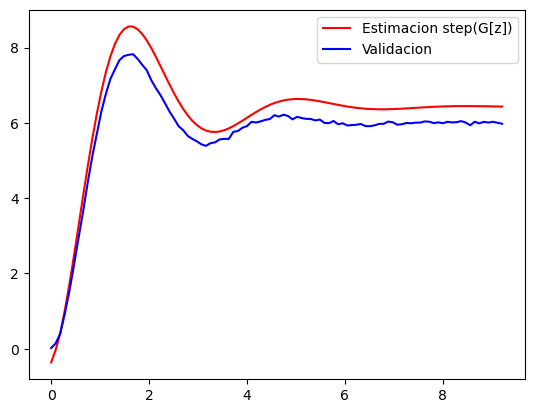

In [10]:
## Se crea el sistema estimado
G_e = control.tf([theta[3],0,0,0],[1,theta[0],0,theta[1],theta[2]],dt)

## Se determina la respuesta estimada al escalón con entrada de validación (K2)
_,ye = control.step_response(K2*G_e,t)
ye = ye+K2*theta[4]
## Graficando las funciones
plt.plot(t,ye,color = 'red')
plt.plot(t,yv,color = 'blue')
plt.legend(['Estimacion step(G[z])','Validacion'])

TransferFunction(array([0.05438219, 0.        , 0.        , 0.        ]), array([ 1.        , -1.22975122,  0.        ,  0.04205387,  0.24349675]), 0.09303374113107254)

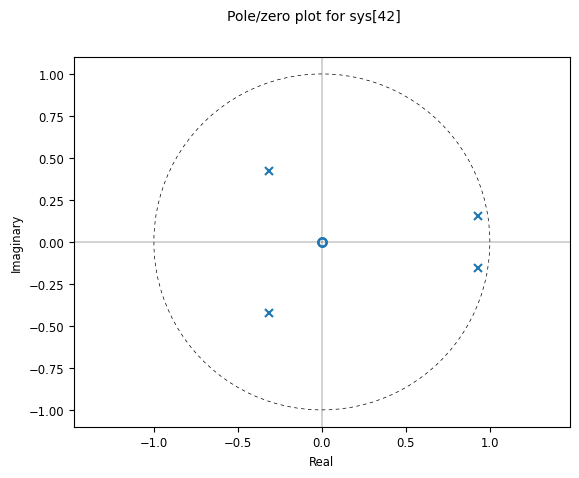

In [36]:
control.pzmap(G_e)
G_e

## Validando el modelo obtenido

Para validar el modelo se utilizarán los datos de validación guardados en la señal yv cuya entrada fue de magnitud 6.
Se procede a reconstruir la señal dato por dato:

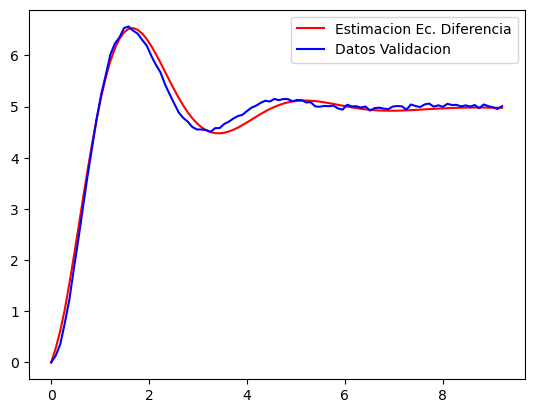

In [35]:
## Reconstruyendo el modelo a partir de ye2 = -df.y1,-df.y3,-df.y4,df.u1 y usando datos de validación
ye1 = np.zeros(len(t))
for k in range(1,len(t)):
    ye1[k] = -theta[0]*ye1[k-1]-theta[1]*ye1[k-3]-theta[2]*ye1[k-4]+theta[3]*uv[k-1]+theta[4]
    
## Graficando las funciones
plt.plot(t,ye1,color = 'red')
plt.plot(t,df.yv,color = 'blue')
plt.legend(['Estimacion Ec. Diferencia','Datos Validacion'])


array([ 0.02592876, -0.04771941, -0.10812006, -0.15551761, -0.19064777,
       -0.21460435, -0.22871899, -0.23445596, -0.2333235 , -0.2268017 ,
       -0.21628667, -0.20304985, -0.18821097, -0.172723  , -0.15736721,
       -0.1427564 , -0.12934447, -0.11744065, -0.10722679, -0.09877632,
       -0.09207382, -0.08703419, -0.08352075, -0.08136166, -0.08036447,
       -0.08032841, -0.0810545 , -0.08235348, -0.0840517 , -0.08599504,
       -0.08805136, -0.09011132, -0.09208826, -0.09391706, -0.09555236,
       -0.09696631, -0.09814613, -0.09909145, -0.09981177, -0.10032397,
       -0.10065011, -0.1008154 , -0.10084649, -0.10077008, -0.10061179,
       -0.10039528, -0.10014174, -0.09986946, -0.0995937 , -0.09932669,
       -0.09907774, -0.09885347, -0.09865807, -0.09849368, -0.09836068,
       -0.09825807, -0.0981838 , -0.09813504, -0.09810851, -0.09810068,
       -0.09810797, -0.09812693, -0.09815433, -0.09818727, -0.09822322,
       -0.09826006, -0.09829605, -0.09832988, -0.09836059, -0.09